In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# 1. Simple linear regression
## 1.1 Generating a dataset

In [11]:
# Make dataset
x_train = 10*np.random.rand(100)         # 100 data points in [0, 10]

noise = np.random.normal(0,1, 100)       # gaussian data, mean=0, std=1
y_train = (2*x_train + 8) + noise        # target is a linear function of the input with some noise

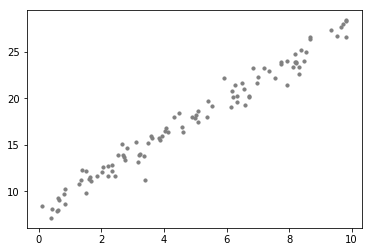

In [12]:
# Plots
plt.scatter(x_train, y_train, s=10, c='grey')
plt.show()

## 1.2 Training and fitting a regression model

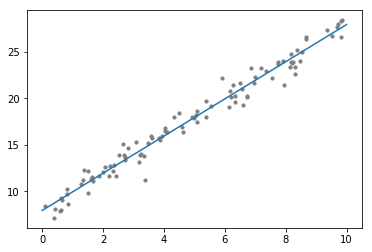

In [13]:
from sklearn.linear_model import LinearRegression

# Train Regression
reg = LinearRegression()
reg.fit(x_train[:, np.newaxis], y_train)

# Predict for 50 equally spaced values in [0, 10]
x_test = np.linspace(0, 10, 50)
y_test = reg.predict(x_test[:, np.newaxis])

# Plots
plt.scatter(x_train, y_train, s=10, c='grey')
plt.plot(x_test, y_test)
plt.show()

## 1.3 Evaluating regression
- Use cross-validation with k=5 folds

In [14]:
from sklearn.model_selection import cross_val_score

reg = LinearRegression()
r2 = cross_val_score(reg, x_train[:, np.newaxis], y_train, cv=5, scoring='r2')
mae = -cross_val_score(reg, x_train[:, np.newaxis], y_train, cv=5, scoring='neg_mean_absolute_error')
mse = -cross_val_score(reg, x_train[:, np.newaxis], y_train, cv=5, scoring='neg_mean_squared_error')

In [15]:
# Description of target data
print(f"Variance(y_train) = {y_train.var()}")
print(f"Std(y_train) = {y_train.std()}")
print(f"y_train ranges approximately in {y_train.mean():.2f} +- {y_train.std()*2:.2f}")

# Print scores for each partition
print("\nAveraged cross-validation scores:")
print(f"MSE = {mse.mean():.2f}, MAE = {mae.mean():.2f}")
print(f"R2 = 1-MSE/var = {r2.mean():.2f}")

Variance(y_train) = 32.622439318009796
Std(y_train) = 5.7116056689874695
y_train ranges approximately in 17.61 +- 11.42

Averaged cross-validation scores:
MSE = 0.93, MAE = 0.75
R2 = 1-MSE/var = 0.97


# 2. Linear regression with multiple input features

## 2.1 Generating a dataset

In [16]:
# Make dataset
X_train = 10*np.random.rand(1000, 2)    # 1000 data points, 2 features (x0, x1) in the range [0, 10]

noise = np.random.normal(0,2, 1000)     # 1000 points from gaussian, mean=0, std=2
y_train = (-2*X_train[:,0] + 2*X_train[:,1]  + 2) + noise

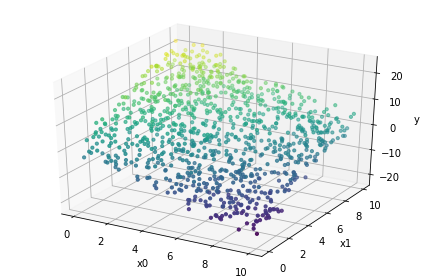

In [17]:
# Plots
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:,0], X_train[:,1], y_train, s=10, c=y_train)
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_zlabel('y')
plt.tight_layout()
plt.show()

## 2.2 Training and fitting a regression model

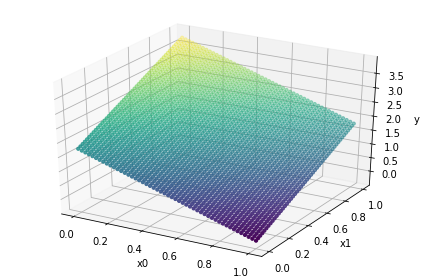

In [18]:
# Train regression
reg = LinearRegression()
reg.fit(X_train, y_train)

# Make a grid of 50 equally spaced values
values = np.linspace(0,1,50)
X_test = np.array([[x0, x1] for x0 in values for x1 in values])
# Predict values on the grid
y_test = reg.predict(X_test)

# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test[:,0], X_test[:,1], y_test, s=10, c=y_test)
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_zlabel('y')
plt.tight_layout()
plt.show()